In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [ ]:
% matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/olympic_results.csv", index_col=0)
df.head()

,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
discipline_title,,,,,,,,,,,,,,
Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,ES,ESP,NaN,NaN,NaN,NaN
Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,SM,SMR,NaN,NaN,NaN,NaN
Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,US,USA,NaN,NaN,NaN,NaN
Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",False,4,Slovakia,SK,SVK,NaN,NaN,NaN,NaN
Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",False,5,Japan,JP,JPN,NaN,NaN,NaN,NaN


In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of countries  location in this dataset such as {}... \n".format(len(df.event_title.unique()),
                                                                           ", ".join(df.event_title.unique()[0:5])))

print("There are {} countries in this dataset such as {}... \n".format(len(df.country_name.unique()),
                                                                                      ", ".join(df.country_name.unique()[0:5])))

There are 159020 observations and 14 features in this dataset. 

There are 1489 types of countries  location in this dataset such as Trap Mixed Team, 50m Rifle 3 Positions women, 50m Rifle 3 Positions Men, 25m Rapid Fire Pistol Men, 10m Air Rifle Men... 

There are 238 countries in this dataset such as Spain, San Marino, United States of America, Slovakia, Japan... 



In [ ]:
df[["event_title", "country_name","rank_position"]].head()

,event_title,country_name,rank_position
discipline_title,,,
Shooting,Trap Mixed Team,Spain,1
Shooting,Trap Mixed Team,San Marino,2
Shooting,Trap Mixed Team,United States of America,3
Shooting,Trap Mixed Team,Slovakia,4
Shooting,Trap Mixed Team,Japan,5


In [ ]:
country = df.groupby("country_name")

In [ ]:
country.describe().head()

event_title                                                   \
                     count unique                                       top   
country_name                                                                  
Afghanistan             64     42  Flyweight, Freestyle (≤52 kilograms) Men   
Albania                 71     45               25m pistol 3030 shots women   
Algeria                357    175                              marathon men   
American Samoa          28     26                         50m freestyle men   
Andorra                175     49                          giant slalom men   

                    slug_game                             participant_type  \
               freq     count unique             top freq            count   
country_name                                                                 
Afghanistan       5        64     15     moscow-1980   11               64   
Albania           5        71     13    beijing-2008   10               71   
Algeria          10       357     18     athens-2004   48              357   
American Samoa    2        28     10      seoul-1988    6               28   
Andorra          24       175     24  vancouver-2010   20              175   

                       ...     athlete_full_name      value_unit         \
               unique  ...                   top freq      count unique   
country_name           ...                                                
Afghanistan         2  ...  Mohammed E. EBRAHIMI    3          1      1   
Albania             1  ...            Erjon TOLA    9         25     24   
Algeria             2  ...            Salim ILES    9         82     82   
American Samoa      2  ...        Maselino MASOE    3         11     10   
Andorra             2  ...         Gérard ESCODA   12         74     73   

                               value_type                      
                      top freq      count unique     top freq  
country_name                                                   
Afghanistan      15857000    1          1      1    TIME    1  
Albania             342.5    2         34      4  WEIGHT   13  
Algeria         2:17:21.6    1        111      5    TIME   56  
American Samoa        330    2         12      4  WEIGHT    7  
Andorra             93650    2        144      3    TIME   69  

[5 rows x 52 columns]

In [ ]:
country.mean().sort_values(by="rank_position",ascending=False).head()

KeyError: ignored

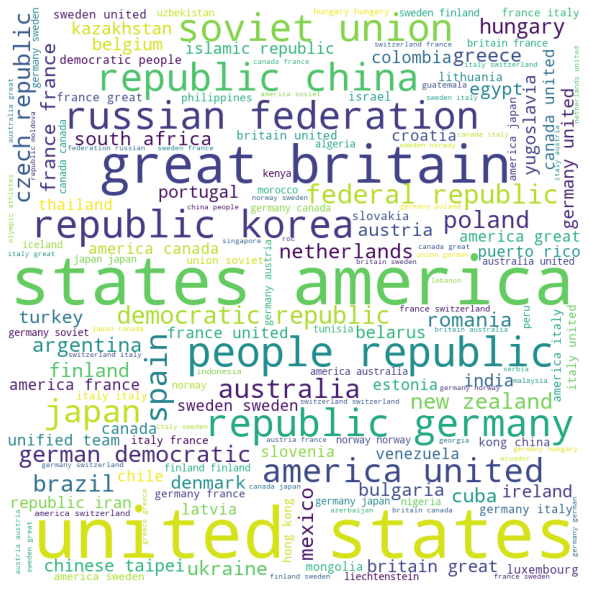

In [ ]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 

df = pd.read_csv(r"/content/drive/MyDrive/olympic_results.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 

for val in df.country_name:
     
   
    val = str(val)
 
   
    tokens = val.split()
     
   
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()